In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import norm
%config InlineBackend.figure_format = 'retina'

In [2]:
# Valores da variável aleatória
media  = 4
desvio = 1

xmin = media-4*desvio
xmax = media+4*desvio
n_pontos = 1000
x = np.linspace(xmin,xmax,n_pontos)
s = np.linspace(0,1,100)
pdf = lambda x,media,desvio: norm.pdf(x, loc=media, scale=desvio)

In [4]:
# Parâmetros para o plot
num_cortes = n_pontos/5
cortes = np.linspace(xmin,xmax,int(num_cortes))
pesos = pdf(cortes, media, desvio)

# Normaliza os pesos e cria o colormap
norm_pesos = mcolors.Normalize(vmin=min(pesos), vmax=max(pesos))
cmap = plt.cm.plasma_r

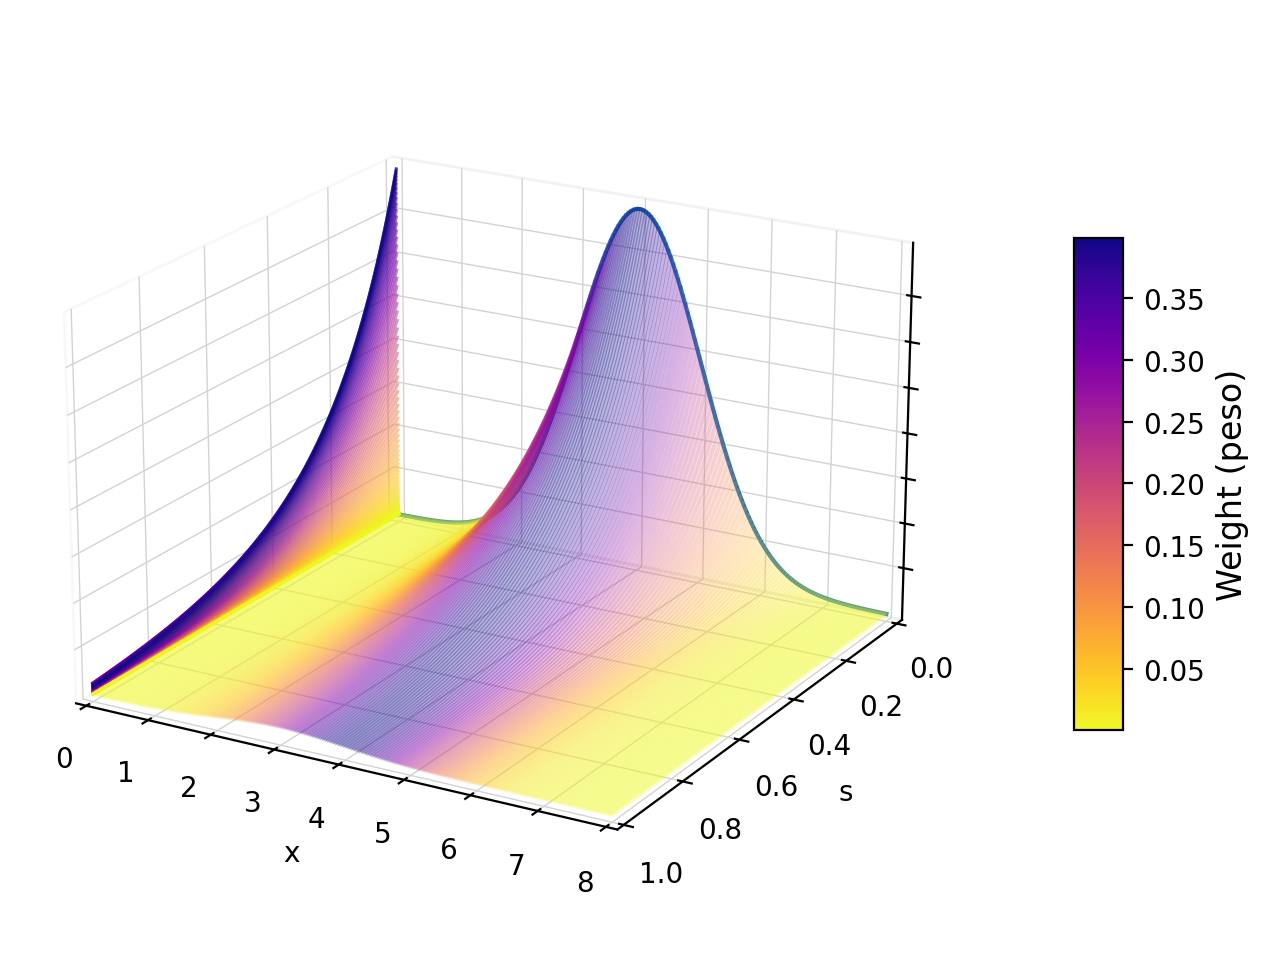

In [5]:
f=plt.figure(figsize=(8,8))

ax=f.add_subplot(projection='3d')

ax.plot(x,pdf(x,media,desvio),np.zeros_like(x),zdir='y')

for pos_corte, peso in zip(cortes, pesos):
    x_corte = np.ones_like(s)*pos_corte
    exponencial = np.exp(-s*pos_corte)
    exponencial_ponderada = exponencial * peso

    # Cor da curva
    color = cmap(norm_pesos(peso))
    ax.plot(x_corte,s,exponencial_ponderada,zdir='z',color=color,alpha=0.3)
    ax.plot(np.zeros_like(s),s,exponencial_ponderada,zdir='z',color=color,alpha=0.3,lw=1)


# Cria a barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_pesos)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, aspect=10, pad=0.1)
cbar.set_label("Weight (peso)", fontsize=12)

# Ajustes para visualização
ax.view_init(20,-60)
ax.set(xlabel='x',ylabel='s')
ax.set_ylim(s.max(),s.min())
ax.set_xlim(x.min(),x.max())
ax.set_zticklabels([])
ax.set_box_aspect([3,3,2])

for ax_axis in (ax.xaxis,ax.yaxis,ax.zaxis):
    ax_axis.pane.fill = False
    ax_axis._axinfo['grid'].update(color = 'lightgray',linewidth = 0.5)

plt.show()

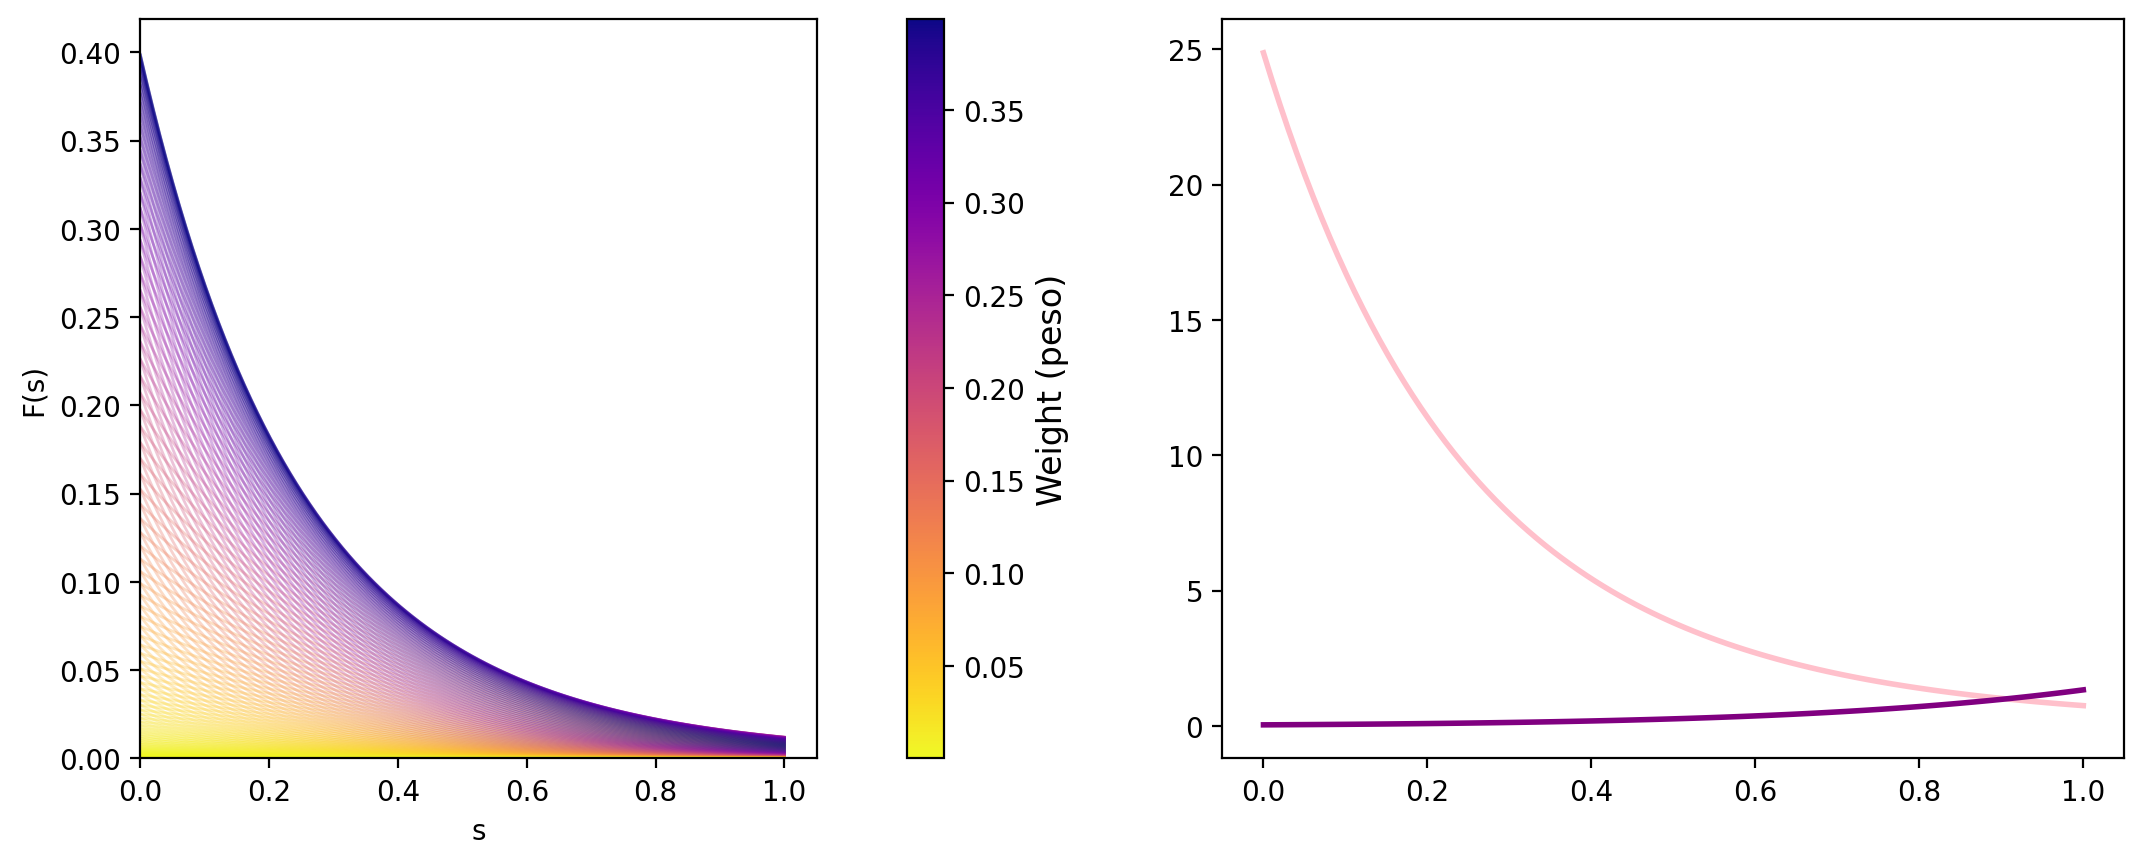

In [15]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(12.8,4.8))

f_mom = np.zeros_like(s)

for pos_corte, peso in zip(cortes, pesos):
    exponencial = np.exp(-s*pos_corte)
    exponencial_ponderada = exponencial * peso
    f_mom+=exponencial_ponderada
    color = cmap(norm_pesos(peso))
    ax1.plot(s,exponencial_ponderada,color=color,alpha=0.3,lw=1)

ax2.plot(s,f_mom,color='pink',lw=2)
ax2.plot(s,1/f_mom,color='purple',lw=2)

# Cria a barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_pesos)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, shrink=1, aspect=20, pad=0.1)
cbar.set_label("Weight (peso)", fontsize=12)

# Ajustes para visualização
ax1.set(xlabel='s',ylabel='F(s)')
ax1.set_xlim(0,)
ax1.set_ylim(0,)

plt.show()